<a href="https://colab.research.google.com/github/sandeepbirudukota/Road-Accident-Prediction/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [27]:
data = pd.read_csv("/content/sample_data/US_Accidents_Dec21_updated.csv")
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [28]:
data.shape

(2781466, 47)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781466 entries, 0 to 2781465
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [30]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [31]:
data.isnull().values.sum()

3346965

In [32]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1695744
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1233
Country                        0
Timezone                    3438
Airport_Code                9255
Weather_Timestamp          49501
Temperature(F)             67784
Wind_Chill(F)             467444
Humidity(%)                71568
Pressure(in)               57875
Visibility(mi)             68876
Wind_Direction             71757
Wind_Speed(mph)           155927
Precipitation(in)         546006
Weather_Condition          68947
Amenity   

In [33]:
data.nunique()


ID                       2781466
Severity                       4
Start_Time               1906084
End_Time                 2295351
Start_Lat                1074653
Start_Lng                1100657
End_Lat                  1061895
End_Lng                  1085744
Distance(mi)               14051
Description              1157487
Number                     45920
Street                    158582
Side                           3
City                       11601
County                      1699
State                         49
Zipcode                   359447
Country                        1
Timezone                       4
Airport_Code                1996
Weather_Timestamp         452988
Temperature(F)               788
Wind_Chill(F)                897
Humidity(%)                  100
Pressure(in)                1063
Visibility(mi)                76
Wind_Direction                24
Wind_Speed(mph)              134
Precipitation(in)            228
Weather_Condition            126
Amenity   

In [34]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.781466e+06,2.781466e+06,2.781466e+06,2.781466e+06,2.781466e+06,2.781466e+06,1.085722e+06,2.713682e+06,2.314022e+06,2.709898e+06,2.723591e+06,2.712590e+06,2.625539e+06,2.235460e+06
mean,2.130039e+00,3.619324e+01,-9.702490e+01,3.619337e+01,-9.702465e+01,7.034322e-01,8.009559e+03,6.153907e+01,5.931096e+01,6.449164e+01,2.948626e+01,9.085833e+00,7.390552e+00,7.082515e-03
std,4.688820e-01,5.357984e+00,1.830022e+01,5.358072e+00,1.830003e+01,1.560683e+00,1.556237e+04,1.866258e+01,2.122781e+01,2.287173e+01,1.022898e+00,2.715192e+00,5.535649e+00,9.452418e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,1.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.340542e+01,-1.180208e+02,3.340470e+01,-1.180205e+02,5.100000e-02,1.265000e+03,4.900000e+01,4.500000e+01,4.800000e+01,2.932000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.604162e+01,-9.218620e+01,3.604171e+01,-9.218085e+01,2.410000e-01,4.001000e+03,6.300000e+01,6.200000e+01,6.700000e+01,2.983000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.010383e+01,-8.036864e+01,4.010378e+01,-8.036892e+01,7.667500e-01,9.503000e+03,7.600000e+01,7.500000e+01,8.400000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.610610e+05,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [35]:
drop_list=[]
feature_list=[]

In [36]:
data[['Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country']]

,Number,Street,Side,City,County,State,Zipcode,Country
0,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US
1,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US
2,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US
3,NaN,I-77 N,R,Akron,Summit,OH,44311,US
4,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US
...,...,...,...,...,...,...,...,...
2781461,NaN,Officer Eric Zapata Memorial Highway E,R,Kalamazoo,Kalamazoo,MI,49001,US
2781462,NaN,I-95 S,R,Providence,Providence,RI,02903,US
2781463,NaN,Adirondack Northway S,R,Ballston Lake,Saratoga,NY,12019,US
2781464,NaN,I-690 E,R,Syracuse,Onondaga,NY,13210,US


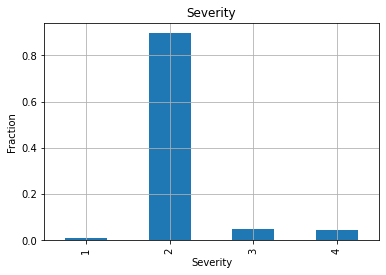

In [37]:
data.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [38]:
bool_cols = [col for col in data.columns if data[col].dtype ==np.dtype('bool')]
booldf = data[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(data)))

There are 166406 non one hot metadata rows, which are 6.0% of the data


In [39]:
bools = booldf.sum(axis=0)

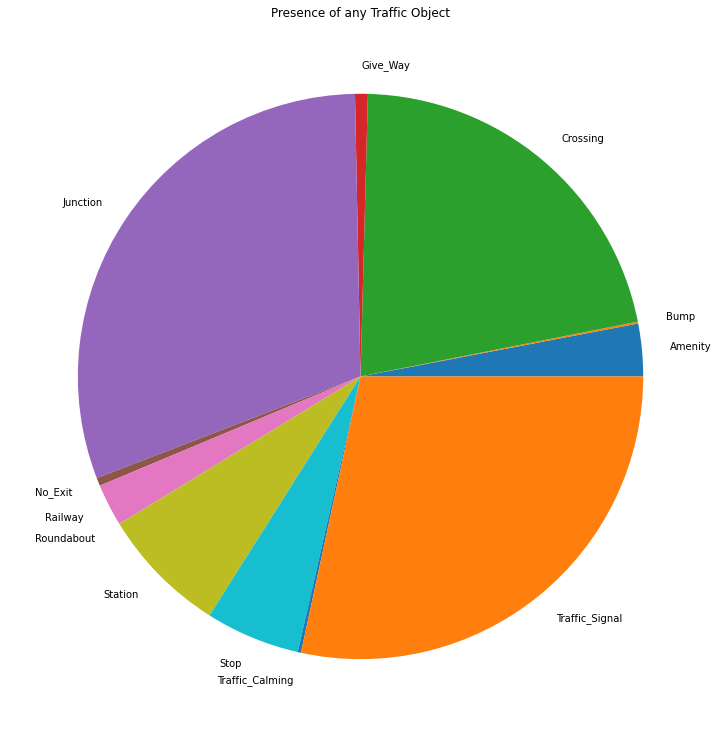

In [40]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Presence of any Traffic Object');

In [41]:
start = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(data.End_Time, format='%Y-%m-%d %H:%M:%S')

In [42]:
print(start)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2781461   2019-04-22 14:41:48
2781462   2019-04-22 14:53:40
2781463   2019-04-22 16:44:42
2781464   2019-04-22 15:05:48
2781465   2019-04-22 15:44:48
Name: Start_Time, Length: 2781466, dtype: datetime64[ns]


In [43]:
print(end)

0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2781461   2019-04-22 15:10:08
2781462   2019-04-22 15:21:30
2781463   2019-04-22 17:13:21
2781464   2019-04-22 15:33:27
2781465   2019-04-22 16:13:17
Name: End_Time, Length: 2781466, dtype: datetime64[ns]


In [44]:
print(end-start)

0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2781461   0 days 00:28:20
2781462   0 days 00:27:50
2781463   0 days 00:28:39
2781464   0 days 00:27:39
2781465   0 days 00:28:29
Length: 2781466, dtype: timedelta64[ns]


top 20 accident durations correspond to 42.2% of the data


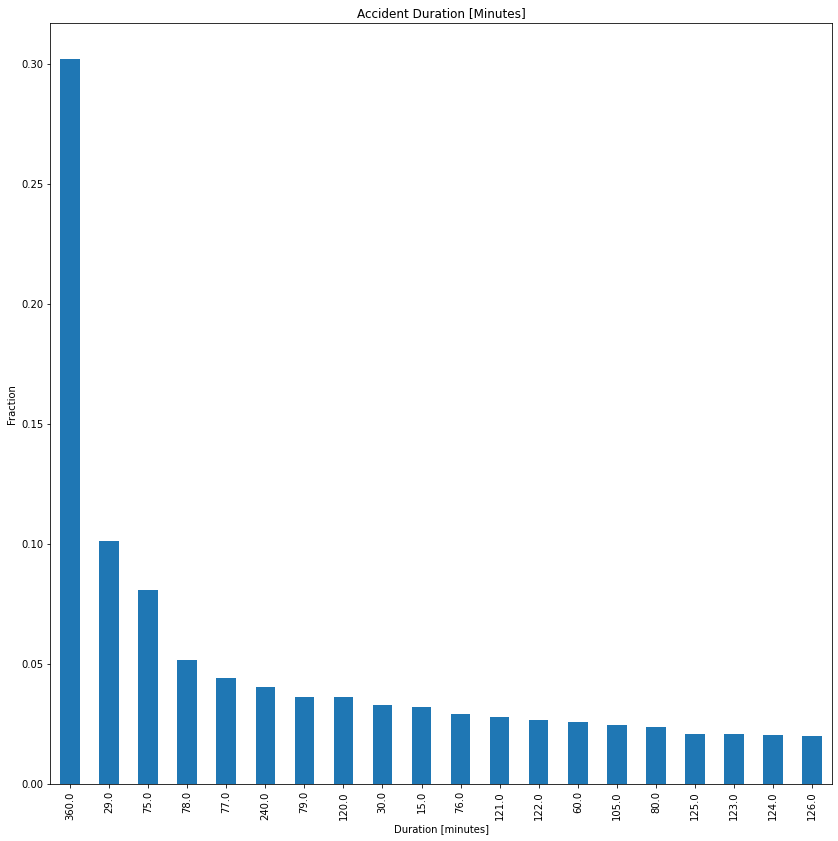

In [45]:
diff = (end-start)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [46]:
data['time'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
data = data.set_index('time')
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
2016-02-08 07:53:43,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """


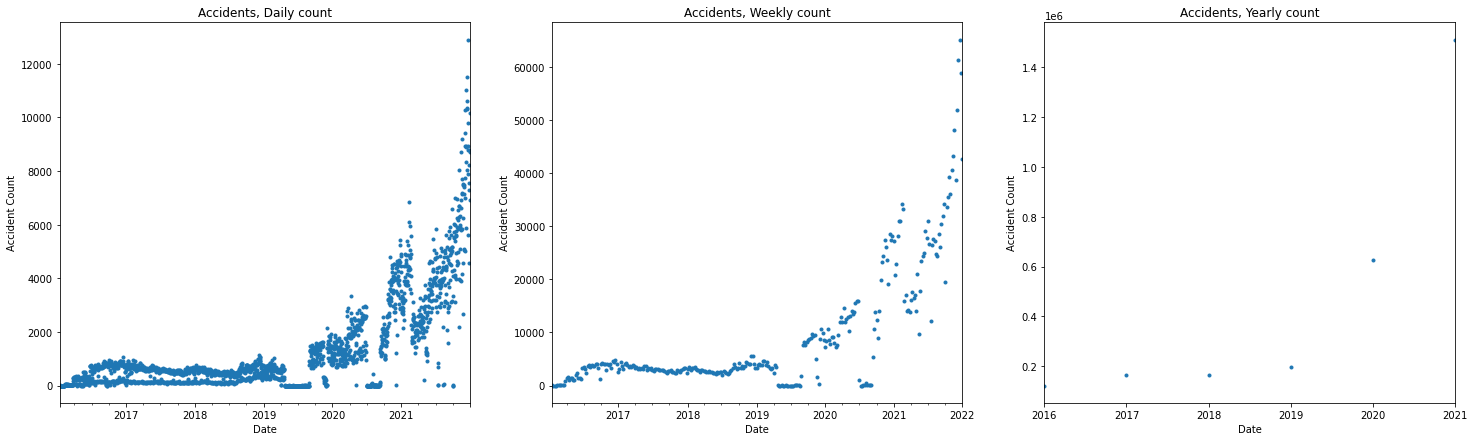

In [47]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(25,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = data.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

In [48]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1695744
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1233
Country                        0
Timezone                    3438
Airport_Code                9255
Weather_Timestamp          49501
Temperature(F)             67784
Wind_Chill(F)             467444
Humidity(%)                71568
Pressure(in)               57875
Visibility(mi)             68876
Wind_Direction             71757
Wind_Speed(mph)           155927
Precipitation(in)         546006
Weather_Condition          68947
Amenity   

In [49]:
daa = data.copy()
daa.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1695744
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1233
Country                        0
Timezone                    3438
Airport_Code                9255
Weather_Timestamp          49501
Temperature(F)             67784
Wind_Chill(F)             467444
Humidity(%)                71568
Pressure(in)               57875
Visibility(mi)             68876
Wind_Direction             71757
Wind_Speed(mph)           155927
Precipitation(in)         546006
Weather_Condition          68947
Amenity   

In [50]:
missing_percent = daa.isna().sum().sort_values(ascending = False)/len(data)
missing_percent

Number                   6.096584e-01
Precipitation(in)        1.963015e-01
Wind_Chill(F)            1.680567e-01
Wind_Speed(mph)          5.605929e-02
Wind_Direction           2.579827e-02
Humidity(%)              2.573032e-02
Weather_Condition        2.478801e-02
Visibility(mi)           2.476248e-02
Temperature(F)           2.436988e-02
Pressure(in)             2.080737e-02
Weather_Timestamp        1.779673e-02
Airport_Code             3.327382e-03
Timezone                 1.236039e-03
Nautical_Twilight        1.031111e-03
Civil_Twilight           1.031111e-03
Astronomical_Twilight    1.031111e-03
Sunrise_Sunset           1.030751e-03
Zipcode                  4.432914e-04
City                     4.925460e-05
Street                   7.190453e-07
Give_Way                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Signal           0.000000e+00
Traffic_Calming          0.000000e+00
Stop        

In [51]:
missing_percent[missing_percent != 0]

Number                   6.096584e-01
Precipitation(in)        1.963015e-01
Wind_Chill(F)            1.680567e-01
Wind_Speed(mph)          5.605929e-02
Wind_Direction           2.579827e-02
Humidity(%)              2.573032e-02
Weather_Condition        2.478801e-02
Visibility(mi)           2.476248e-02
Temperature(F)           2.436988e-02
Pressure(in)             2.080737e-02
Weather_Timestamp        1.779673e-02
Airport_Code             3.327382e-03
Timezone                 1.236039e-03
Nautical_Twilight        1.031111e-03
Civil_Twilight           1.031111e-03
Astronomical_Twilight    1.031111e-03
Sunrise_Sunset           1.030751e-03
Zipcode                  4.432914e-04
City                     4.925460e-05
Street                   7.190453e-07
dtype: float64

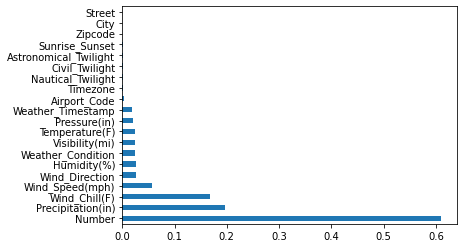

In [52]:
missing_percent[missing_percent != 0].plot(kind = 'barh')

In [53]:
daa['Street'].nunique()

158582

In [57]:
doo = daa.drop(['ID','Distance(mi)', 'Start_Time', 'End_Time','Number', 'Timezone','Weather_Timestamp', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code',
'Start_Lat',	'Start_Lng', 	'End_Lat',	'End_Lng', 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight' ], axis=1)

In [58]:
doo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2781466 entries, 2016-02-08 00:37:08 to 2019-04-22 15:44:48
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Temperature(F)     float64
 2   Wind_Chill(F)      float64
 3   Humidity(%)        float64
 4   Pressure(in)       float64
 5   Visibility(mi)     float64
 6   Wind_Direction     object 
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Weather_Condition  object 
 10  Amenity            bool   
 11  Bump               bool   
 12  Crossing           bool   
 13  Give_Way           bool   
 14  Junction           bool   
 15  No_Exit            bool   
 16  Railway            bool   
 17  Roundabout         bool   
 18  Station            bool   
 19  Stop               bool   
 20  Traffic_Calming    bool   
 21  Traffic_Signal     bool   
 22  Turning_Loop       bool   
 23  Sunrise_Sunset     object 
dtypes: bool(13), floa

In [59]:
doo.head(5)

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 05:56:20,2,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:15:39,2,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,...,True,False,False,False,False,False,False,False,False,Night
2016-02-08 06:51:45,2,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,...,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:53:43,3,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,...,False,False,False,False,False,False,False,False,False,Day


In [60]:
doo.isnull().sum()

Severity                  0
Temperature(F)        67784
Wind_Chill(F)        467444
Humidity(%)           71568
Pressure(in)          57875
Visibility(mi)        68876
Wind_Direction        71757
Wind_Speed(mph)      155927
Precipitation(in)    546006
Weather_Condition     68947
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset         2867
dtype: int64

In [61]:
pmean = doo['Pressure(in)'].mean()
tmean = doo['Temperature(F)'].mean()
wcmean = doo['Wind_Chill(F)'].mean()
hmean = doo['Humidity(%)'].mean()
wsmean = doo['Wind_Speed(mph)'].mean()
prmean = doo['Precipitation(in)'].mean()

In [62]:
doo['Pressure(in)']=doo['Pressure(in)'].fillna(pmean)
doo['Temperature(F)'] = doo['Temperature(F)'].fillna(tmean)
doo['Wind_Chill(F)'] = doo['Wind_Chill(F)'].fillna(wcmean)
doo['Humidity(%)'] = doo['Humidity(%)'].fillna(hmean)
doo['Wind_Speed(mph)'] = doo['Wind_Speed(mph)'].fillna(wsmean)
doo['Precipitation(in)']=doo['Precipitation(in)'].fillna(prmean)

In [63]:
doo.isnull().sum()

Severity                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       68876
Wind_Direction       71757
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    68947
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset        2867
dtype: int64

In [64]:
doo['Visibility(mi)'] = doo['Visibility(mi)'].fillna(doo['Visibility(mi)'].mode()[0])
doo['Wind_Direction'] = doo['Wind_Direction'].fillna(doo['Wind_Direction'].mode()[0])
doo['Weather_Condition'] = doo['Weather_Condition'].fillna(doo['Weather_Condition'].mode()[0])
doo['Sunrise_Sunset'] = doo['Sunrise_Sunset'].fillna(doo['Sunrise_Sunset'].mode()[0])


In [65]:
doo.isnull().sum()

Severity             0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [66]:
df1=doo.copy()

In [67]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.100000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,...,0,0,0,0,0,0,0,0,0,Night
2016-02-08 05:56:20,2,36.9,59.310958,91.0,29.68,10.0,Calm,7.390552,0.020000,Light Rain,...,0,0,0,0,0,0,0,0,0,Night
2016-02-08 06:15:39,2,36.0,59.310958,97.0,29.70,10.0,Calm,7.390552,0.020000,Overcast,...,1,0,0,0,0,0,0,0,0,Night
2016-02-08 06:51:45,2,39.0,59.310958,55.0,29.65,10.0,Calm,7.390552,0.007083,Overcast,...,0,0,0,0,0,0,0,0,0,Night
2016-02-08 07:53:43,3,37.0,29.800000,93.0,29.69,10.0,WSW,10.400000,0.010000,Light Rain,...,0,0,0,0,0,0,0,0,0,Day


In [68]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1.head()

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,42.1,36.100000,58.0,29.76,10.0,16,10.400000,0.000000,56,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,2,36.9,59.310958,91.0,29.68,10.0,1,7.390552,0.020000,56,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,2,36.0,59.310958,97.0,29.70,10.0,1,7.390552,0.020000,79,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,2,39.0,59.310958,55.0,29.65,10.0,1,7.390552,0.007083,79,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 07:53:43,3,37.0,29.800000,93.0,29.69,10.0,22,10.400000,0.010000,56,...,0,0,0,0,0,0,0,0,0,0


In [69]:
sev = df1['Severity']

In [70]:
new = df1.drop(['Severity'], axis = 1)

In [71]:
new.head(5)

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,42.1,36.100000,58.0,29.76,10.0,16,10.400000,0.000000,56,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 05:56:20,36.9,59.310958,91.0,29.68,10.0,1,7.390552,0.020000,56,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 06:15:39,36.0,59.310958,97.0,29.70,10.0,1,7.390552,0.020000,79,0,...,1,0,0,0,0,0,0,0,0,1
2016-02-08 06:51:45,39.0,59.310958,55.0,29.65,10.0,1,7.390552,0.007083,79,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-08 07:53:43,37.0,29.800000,93.0,29.69,10.0,22,10.400000,0.010000,56,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df1)

In [74]:
data_rescaled

array([[0.66666667, 0.46      , 0.43894737, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.44175439, 0.52038933, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.43859649, 0.52038933, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33333333, 0.56491228, 0.56491228, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.52982456, 0.52982456, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.56140351, 0.56140351, ..., 0.        , 0.        ,
        0.        ]])

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [76]:
reduced

array([[ 0.54244562, -0.08772794,  0.39569083, ...,  0.27485745,
         0.04122653, -0.0254234 ],
       [ 0.73064979, -0.0345089 , -0.26859799, ..., -0.05446034,
        -0.03129612, -0.01332132],
       [ 0.72486457, -0.46155868, -0.17765788, ..., -0.09736727,
        -0.02365028,  0.00700956],
       ...,
       [-0.40538148, -0.0656707 , -0.14157166, ..., -0.04420853,
        -0.03333229, -0.01445302],
       [-0.39340695, -0.07734607, -0.07516889, ..., -0.0495422 ,
        -0.03572278, -0.01198422],
       [-0.4399779 , -0.06943715,  0.02142536, ...,  0.31459738,
         0.05068302, -0.03110881]])